### Visualisasi Data - Tableau

Dashboard visualisasi data dilakukan menggunakan perangkat lunak Tableau, berikut merupakan link yang digunakan untuk mengakses data dashboard terkait project.

https://public.tableau.com/shared/2Q2FN4BZT?:display_count=n&:origin=viz_share_link

## BAB I Pendahuluan

Nama  : Lukas Adiwijaya Djajakirana

Program ini dibuat untuk melakukan analisis statistik dan membuat dashboard visualisasi data

## BAB II Identifikasi Masalah

### Topik Permasalahan

Topik permasalahan yang terdapat saat ini adalah terkait dengan pekerjaan data scientist. Pekerjaan data scientist memiliki tugas untuk mengolah data, membangun model prediktif, membuat AI, dan mengambil keputusan berdasarkan model/data yang telah ada, saat ini data scientist merupakan pekerjaan yang dibutuhkan oleh banyak perusahaan. Sehingga muncul pertanyaan, apakah pekerjaan data scientist merupakan pekerjaan yang menjanjikan, dan juga berapakah gaji seorang data scientist.

Pada permasalahan ini akan diambil gaji pekerjaan data scientist sebagai topik permasalahan yang utama, untuk itu akan dilakukan analisis lebih lanjut terkait dengan gaji data scientist.

### *Problem Statement*

Berkaitan dengan topik permasalahan yang telah dibahas, yaitu terkait dengan Gaji Data Scientist, terdapat persoalan yang lebih mendalam yang perlu dijawab, oleh karena itu akan digunakan problem statement untuk menentukan persoalan/*problem* yang akan dijabarkan lebih mendetail. *Problem Statement* yang digunakan pada kasus ini menggunakan metode SMART.

Specific  : Menganalisis gaji pekerjaan data scientist

Measurable : Menentukan potensi gaji pekerjaan data scientist

Achivable  : Dengan menggunakan dataset data scientist salaries dari AI-Jobs

Relevant : Informasi tentang data scientist relevan untuk perusahaan, calon pelamar kerja, dan industri secara keseluruhan

Time-Bound  : Analisis diselesaikan dalam 6 hari ke depan

Conclusion : Melakukan analisis gaji untuk mendapatkan potensi tingkatan gaji, berdasarkan data pada AI-Jobs yang berguna untuk calon data scientist, industri dan perusahaan dalam waktu 6 hari ke depan.

### Latar Belakang

Perusahaan A merupakan perusahaan besar yang memegang banyak data, dan saat ini perusahaan tersebut ingin melebarkan sayapnya di luar negeri. Perusahaan A membutuhkan orang yang dapat membuat *Machine Learning*, melakukan penyelidikan data, dan mengambil kesimpulan dari data tersebut, yang menunjukkan bahwa perusahaan A membutuhkan seorang data scientist, data analyst, data engineer dan machine learning engineer. Karena mereka tidak pernah memiliki pekerja yang berada di luar negeri, untuk itu perusahaan A ingin melakukan riset terhadap gaji pekerjaan-pekerjaan tersebut. Oleh karena itu saya ditugaskan untuk membantu perusahaan A mencari tahu tentang pekerjaan tersebut lebih lanjut di luar negeri.

### Penjabaran Masalah

Penjabaran masalah dilakukan menggunakan metode 5W+1H, berikut merupakan penjabarannya:

- Negara manakah yang memiliki pekerjaan terbanyak?
- Apakah ada perbedaan gaji berdasarkan lokasi perusahaan?
- Bagaimana pengalaman pekerjaan mempengaruhi gaji?
- Apakah ukuran perusahaan mempengaruhi gaji?
- Bagaimanakah statistik gaji tiap jenis pekerjaan?
- Apakah terdapat perbedaan terkait dengan gaji dan jenis pekerjaan?
- Apakah remote work mempengaruhi gaji?
- Berapa presentase remote work dalam lingkup pekerjaan ini?

## BAB III Data Loading

Data yang digunakan pada Milestone 1 ini diambil dari AI Jobs, dengan data bernama AI, ML, Data Scientist Salary Data, berikut merupakan link website yang digunakan:

https://ai-jobs.net/salaries/download/

In [3]:
# Melakukan import library yang akan digunakan untuk perhitungan dan analisis data
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Melakukan pembacaan file csv yang digunakan untuk analisis data
df = pd.read_csv('salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,187200,USD,187200,CA,0,CA,M
1,2024,MI,FT,Data Scientist,100800,USD,100800,CA,0,CA,M
2,2024,SE,FT,Data Engineer,153200,USD,153200,US,100,US,M
3,2024,SE,FT,Data Engineer,102200,USD,102200,US,100,US,M
4,2024,SE,FT,Robotics Software Engineer,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
13800,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
13801,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
13802,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
13803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Dari tabel didapatkan bahwa terdapat 13805 data, dengan 11 kolom yang berisikan work year, experience level, employment type, job title, salary, salary currency, sallary in USD, employee residence, remote ratio, company location dan company size.

## BAB IV Data Cleaning

In [93]:
print('Job title count: ',len(df['job_title'].unique()))
# Menghitung jumlah pekerjaan tiap jenis pekerjaan
job_counts = df['job_title'].value_counts()
job_counts.head()

Job title count:  145


job_title
Data Engineer                2987
Data Scientist               2840
Data Analyst                 2055
Machine Learning Engineer    1452
Research Scientist            433
Name: count, dtype: int64

Setelah melakukan perhitungan terkait jenis pekerjaan, maka akan dilakukan filter berdasarkan 4 pekerjaan terbanyak yaitu, Data Engineer, Data Scientist, Data Analyst dan Machine Learning Engineer. Analisis gaji pekerjaan akan dilakukan berdasarkan 4 jenis pekerjaan tersebut.

In [94]:
print('Jumlah data Data Engineer, Data Scientist, Data Analyst, dan Machine Learning Engineer',job_counts.head(4).sum())

# Memfilter data pekerjaan
df1 = df[df['job_title'].isin(job_counts.head(4).index)].reset_index(drop=True)
df1

Jumlah data Data Engineer, Data Scientist, Data Analyst, dan Machine Learning Engineer 9334


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,187200,USD,187200,CA,0,CA,M
1,2024,MI,FT,Data Scientist,100800,USD,100800,CA,0,CA,M
2,2024,SE,FT,Data Engineer,153200,USD,153200,US,100,US,M
3,2024,SE,FT,Data Engineer,102200,USD,102200,US,100,US,M
4,2024,MI,FT,Data Analyst,105000,USD,105000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
9329,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
9330,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
9331,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
9332,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


Setelah dilakukan filter terhadap pekerjaan Data Engineer, Data Scientist, Data Analyst dan Machine Learning Engineer, didapatkan jumlah data sebanyak 9334 data.

In [95]:
# Melakukan pengecekan terhadap data N/A dan data kosong
print('Data N/A:\n',df1.isna().sum(), sep='')

print('\nData Kosong:\n',df1.isnull().sum(), sep='')

# Melakukan penyimpanan data tabel yang data nya telah dibersihkan ke csv untuk melakukan analisis pada Tableau dan analisis lainnya
df1.to_csv('ds_salaries.csv')

Data N/A:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Data Kosong:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Didapatkan bahwa dataframe tidak terdapat data kosong maupun data N/A

## BAB V Analisis dan Perhitungan

### Menentukan negara dengan pekerjaan terbanyak

In [4]:
df_filtered = pd.read_csv('ds_salaries.csv')

company_location
US    8222
GB     418
CA     231
ES     104
DE      48
Name: count, dtype: int64


<Axes: xlabel='company_location'>

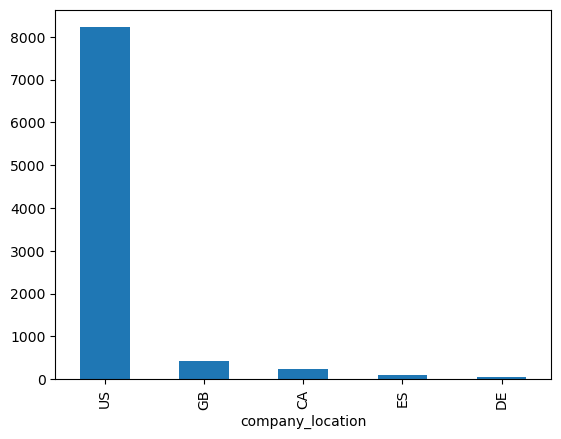

In [5]:
print(df_filtered['company_location'].value_counts().head())
df_filtered['company_location'].value_counts().head().plot(kind='bar')

Didapatkan bahwa negara Amerika Serikat memiliki jumlah pekerjaan terbanyak yaitu 8222 pekerja berdasarkan data, pada peringkat dua diduduki oleh Great Britain (GB) dengan jumlah pekerja sebanyak 418, selanjutnya terdapat Canada dengan jumlah pekerja sebanyak 231. Hal ini dapat disebabkan oleh pengambilan data yang mayoritasnya diambil dari negara Amerika Serikat.

### Menentukan pengaruh pengalaman kerja terhadap gaji

c:\Users\lukas_dtet3v6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lukas_dtet3v6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


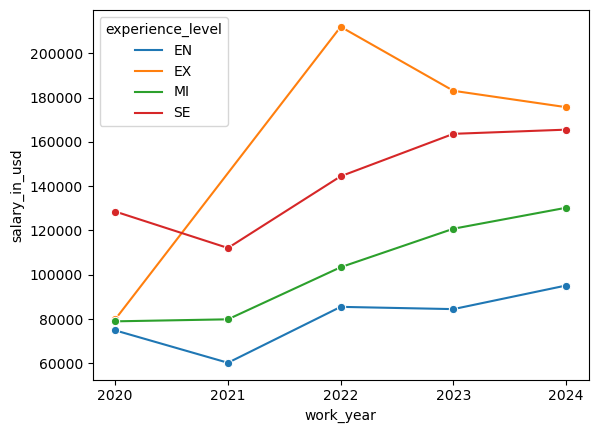

In [8]:
mean_salary_df = df_filtered.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean().reset_index()
ax = sns.lineplot(data=mean_salary_df, x='work_year', y='salary_in_usd', hue='experience_level', marker='o')
ax.set_xticks(range(2020, 2025, 1))

Didapatkan bahwa pengalaman kerja dapat mempengaruhi gaji karyawan, semakin tinggi pengalaman kerja, maka gaji karyawan semakin tinggi, dari grafik didapatkan bahwa EN atau entry-level dengan pengalaman kerja yang minim, berada di bawah sedangkan EX atau executive level, mendapatkan gaji tertinggi diantara keempat data.

### Menentukan pengaruh ukuran perusahaan terhadap gaji karyawan

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

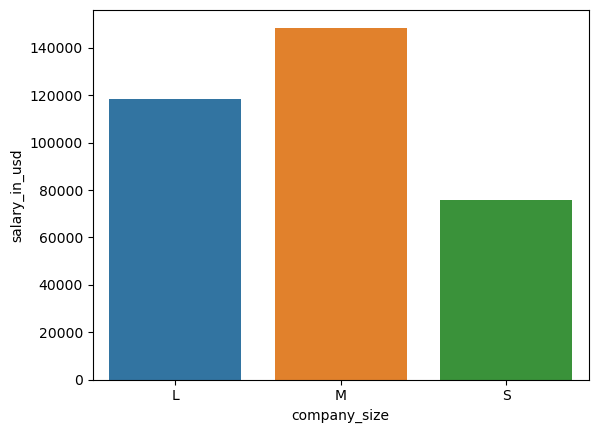

In [7]:
size_salary_df = df_filtered.groupby(['company_size'])['salary_in_usd'].mean().reset_index()
sns.barplot(data=size_salary_df, x='company_size', y='salary_in_usd')

Didapatkan dari grafik bahwa perusahaan dengan ukuran karyawan sebanyak 50 hingga 250 orang memiliki gaji rata-rata karyawan yang tinggi, dibandingkan dengan perusahaan dengan jumlah karyawan lebih dari 250 orang dan perusahaan dengan jumlah karyawan yang kurang dari 50 orang. Gaji rata-rata terendah didapatkan oleh karyawan yang bekerja di perusahaan dengan jumlah karyawan yang kecil.

### Menentukan presentase remote work dalam lingkup pekerjaan

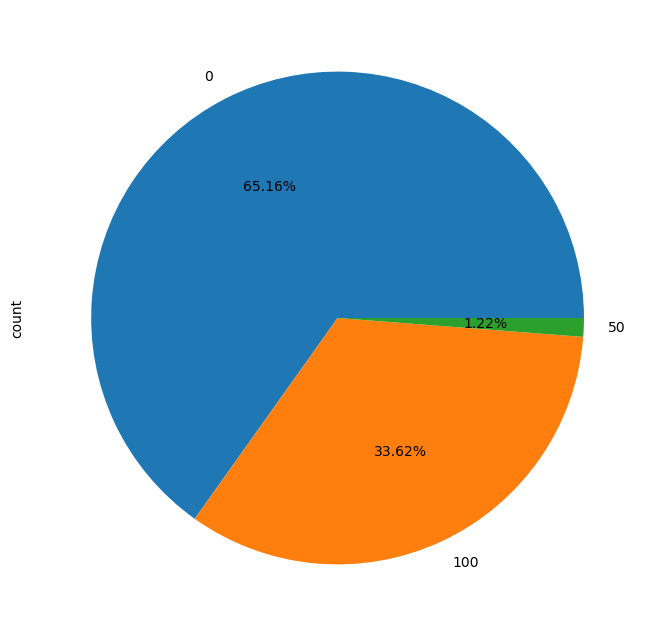

In [99]:
fig,ax1 = plt.subplots(figsize=(8,8))

df_filtered['remote_ratio'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan data diatas, didapatkan bahwa pekerjaan Data Scientist, Data Analyst, Data Engineer, dan Machine Learning Engineer, memiliki tingkat remote work sebesar 33.62% untuk pekerjaan yang merupakan full remote work, sedangkan tingkat karyawan yang bekerja partially remote/hybird sebesar 1.22%, dan sebagian besar pekerja melakukan pekerjaannya secara offline dengan presentase sebesar 65.16%.

### Menentukan statistik gaji berdasarkan pekerjaan

In [7]:
# Membuat filter terhadap masing-masing jenis pekerjaan
ds_job = df_filtered[df_filtered['job_title'] == 'Data Scientist'].reset_index(drop=True)
de_job = df_filtered[df_filtered['job_title'] == 'Data Engineer'].reset_index(drop=True)
ml_job = df_filtered[df_filtered['job_title'] == 'Machine Learning Engineer'].reset_index(drop=True)
da_job = df_filtered[df_filtered['job_title'] == 'Data Analyst'].reset_index(drop=True)

ds_mean = ds_job['salary_in_usd'].mean()
ds_median = ds_job['salary_in_usd'].median()
ds_std = ds_job['salary_in_usd'].std()
ds_skewness = ds_job['salary_in_usd'].skew()
ds_kurtosis = ds_job['salary_in_usd'].kurtosis()

de_mean = de_job['salary_in_usd'].mean()
de_median = de_job['salary_in_usd'].median()
de_std = de_job['salary_in_usd'].std()
de_skewness = de_job['salary_in_usd'].skew()
de_kurtosis = de_job['salary_in_usd'].kurtosis()

ml_mean = ml_job['salary_in_usd'].mean()
ml_median = ml_job['salary_in_usd'].median()
ml_std = ml_job['salary_in_usd'].std()
ml_skewness = ml_job['salary_in_usd'].skew()
ml_kurtosis = ml_job['salary_in_usd'].kurtosis()

da_mean = da_job['salary_in_usd'].mean()
da_median = da_job['salary_in_usd'].median()
da_std = da_job['salary_in_usd'].std()
da_skewness = da_job['salary_in_usd'].skew()
da_kurtosis = da_job['salary_in_usd'].kurtosis()

# Menampilkan hasil perhitungan statistik
print("Statistics for Salaries in USD:\n")
print(f"Data Scientist \nMean: {ds_mean:.2f} \nMedian: {ds_median:.2f} \nStd Dev: {ds_std:.2f} \nSkewness: {ds_skewness:.2f} \nKurtosis: {ds_kurtosis:.2f} \n")
print(f"Data Engineer \nMean: {de_mean:.2f} \nMedian: {de_median:.2f} \nStd Dev: {de_std:.2f} \nSkewness: {de_skewness:.2f} \nKurtosis: {de_kurtosis:.2f} \n")
print(f"Machine Learning Engineer \nMean: {ml_mean:.2f} \nMedian: {ml_median:.2f} \nStd Dev: {ml_std:.2f} \nSkewness: {ml_skewness:.2f} \nKurtosis: {ml_kurtosis:.2f} \n")
print(f"Data Analyst \nMean: {da_mean:.2f} \nMedian: {da_median:.2f} \nStd Dev: {da_std:.2f} \nSkewness: {da_skewness:.2f} \nKurtosis: {da_kurtosis:.2f} \n")


Statistics for Salaries in USD:

Data Scientist 
Mean: 153950.26 
Median: 150060.00 
Std Dev: 61695.24 
Skewness: 0.93 
Kurtosis: 5.64 

Data Engineer 
Mean: 146820.54 
Median: 140000.00 
Std Dev: 57838.11 
Skewness: 0.98 
Kurtosis: 4.42 

Machine Learning Engineer 
Mean: 187186.94 
Median: 184850.00 
Std Dev: 65279.74 
Skewness: 0.68 
Kurtosis: 3.69 

Data Analyst 
Mean: 108437.61 
Median: 104000.00 
Std Dev: 46920.33 
Skewness: 3.32 
Kurtosis: 38.00 



Didapatkan statistik gaji masing-masing pekerjaan, dengan Data Analyst merupakan pekerjaan dengan rata-rata gaji terendah diantara pekerjaan lainnya, disusul oleh Data Engineer, kemudian Data Scientist dan pekerjaan dengan rata-rata gaji tertinggi yaitu Machine Learning Engineer. Terkait dengan distribusi gaji, tiap pekerjaan berdistribusi positive skewed, dengan Data Analyst memiliki skewness tertinggi, yang menandakan bahwa sebagian besar data analyst memiliki gaji berkisar dekat dengan mean dan median gaji.

### Menentukan Pengaruh Jenis Pekerjaan Terhadap Gaji Pekerjaan

Pengaruh jenis pekerjaan terhadap gaji pekerjaan dilakukan menggunakan *Analysis of Variance* atau biasa disingkat menjadi ANOVA Test. Ada beberapa kriteria yang perlu dipenuhi sebelum melakukan testing, yaitu setiap group merupakan group independent, berdistribusi normal dan memiliki variansi yang mirip. Syarat-syarat tersebut telah dipenuhi, oleh karena itu selanjutnya dilakukan pengecekan pengaruh pekerjaan terhadap gaji. Digunakan confidence level sebesar 0.05

H0: Tidak terdapat perbedaan gaji signifikan antar pekerjaan

H1: Terdapat perbedaan gaji signifikan antar pekerjaan

In [101]:
res = stats.f_oneway(ds_job['salary_in_usd'], de_job['salary_in_usd'], ml_job['salary_in_usd'], da_job['salary_in_usd'])
print('P-value:',res.pvalue)

P-value: 0.0


Didapatkan P-Value hasil dari ANOVA Test sebesar 0.00 < 0.05 (critical value), yang menandakan bahwa hypothesis null ditolak, sehingga dapat disimpulkan bahwa terdapat perbedaan gaji yang signifikan diantara keempat pekerjaan tersebut.

### Menentukan Pengaruh Remote Work Terhadap Gaji Pekerjaan

Pada perhitungan data sebelumnya, telah didapatkan bahwa distribusi gaji pekerjaan berdistribusi skewed positif, oleh karena itu, korelasi remote work akan ditentukan berdasarkan metode Spearman.

In [102]:
corr_rho, pval_s = stats.spearmanr(df1['remote_ratio'], df1['salary_in_usd'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.04, p-value: 1.6864376811158864e-05


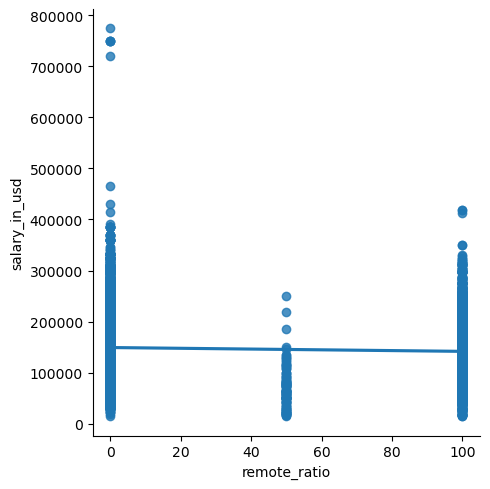

In [103]:
sns.lmplot(data=df_filtered,x='remote_ratio', y='salary_in_usd')

Didapatkan nilai rho-correlation sebesar -0.04 yang menandakan bahwa  keterkaitan antara remote work terhadap gaji pekerjaan sangat rendah dan arti (-) dalam hal ini menandakan bahwa semakin tinggi remote ratio nya maka semakin rendah gaji yang diterima. Sedangkan pada P-Value didapatkan nilai 1.69e-5 yang berarti P-Value < 0.05 (critical value), yang menunjukkan bahwa hypothesis null ditolak. Sehingga pekerjaan yang dilakukan secara Work From Home dapat mempengaruhi gaji pekerjaan walaupun pengaruh tersebut sangat rendah.

## BAB VI Kesimpulan

Berdasarkan analisis gaji yang telah dilakukan, berikut adalah kesimpulan terkait potensi tingkatan gaji untuk calon data scientist, industri, dan perusahaan dalam enam hari ke depan:

- Pekerjaan dengan Gaji Tertinggi:
Machine Learning Engineer merupakan pekerjaan yang memiliki rata-rata gaji tertinggi di antara pekerjaan lainnya. Jika Anda memiliki keterampilan dalam bidang ini, peluang mendapatkan gaji yang baik sangat besar.
- Lokasi Pekerjaan:
Pekerjaan data scientist terbanyak terdapat di Amerika Serikat. Negara ini memiliki pasar kerja yang luas dan berkembang pesat dalam bidang data science.
- Pengalaman Kerja:
Pengalaman kerja merupakan salah satu faktor yang dapat meningkatkan gaji pekerja. Semakin lama pengalaman kerja, semakin tinggi potensi gaji yang dapat diterima.
- Remote Work:
Presentase full-time remote work pada bidang ini sebesar 33.62%. Meskipun korelasi antara remote work dan gaji sangat minim, perusahaan yang menawarkan fleksibilitas kerja ini dapat menarik calon karyawan.
- Ukuran Perusahaan:
Perusahaan dengan karyawan 50 hingga 250 orang merupakan perusahaan dengan gaji karyawan rata-rata tertinggi. Ukuran perusahaan mempengaruhi struktur gaji dan kesempatan karir.

### Visualisasi Data - Tableau

Dashboard visualisasi data dilakukan menggunakan perangkat lunak Tableau, berikut merupakan link yang digunakan untuk mengakses data dashboard yang dipakai pada Milestone 1 ini.

https://public.tableau.com/shared/7Y7SCQ2T4?:display_count=n&:origin=viz_share_link